In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

In [2]:
# Load CIFAR-10 dataset
(ds_train, ds_test), ds_info = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)


In [3]:
# Preprocessing function
NORMALIZE = lambda x, y: (tf.image.per_image_standardization(tf.cast(x, tf.float32)), y)
ds_train = ds_train.map(NORMALIZE).batch(128).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(NORMALIZE).batch(128).prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
# CNN Model
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
# MLP Model
def create_mlp_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [13]:
# Compile and train function
def train_model(model, name):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(ds_train, epochs=20, validation_data=ds_test)
    return history, model

In [14]:
# Train CNN
cnn_model = create_cnn_model()
cnn_history, cnn_model = train_model(cnn_model, "CNN")

Epoch 1/20


c:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 225ms/step - accuracy: 0.3947 - loss: 1.9928 - val_accuracy: 0.5196 - val_loss: 1.3661
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 87s 224ms/step - accuracy: 0.6146 - loss: 1.1308 - val_accuracy: 0.6714 - val_loss: 0.9430
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 226ms/step - accuracy: 0.6938 - loss: 0.8823 - val_accuracy: 0.7058 - val_loss: 0.8836
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 226ms/step - accuracy: 0.7503 - loss: 0.7190 - val_accuracy: 0.7232 - val_loss: 0.8288
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 226ms/step - accuracy: 0.7952 - loss: 0.5842 - val_accuracy: 0.7278 - val_loss: 0.8342
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 224ms/step - accuracy: 0.8282 - loss: 0.4862 - val_accuracy: 0.7452 - val_loss: 0.8195
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 226ms/step - accuracy: 0.8582 - loss: 0.4004 - val_accuracy: 0.7339 - val_loss: 0.9144
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 224ms/step - accuracy: 0.8853 - loss: 0.3250 - val

In [15]:
# Train MLP
mlp_model = create_mlp_model()
mlp_history, mlp_model = train_model(mlp_model, "MLP")

Epoch 1/20


c:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.2822 - loss: 2.4984 - val_accuracy: 0.4529 - val_loss: 1.5747
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.3869 - loss: 1.8011 - val_accuracy: 0.4804 - val_loss: 1.4722
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4355 - loss: 1.6088 - val_accuracy: 0.4966 - val_loss: 1.4228
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4615 - loss: 1.5171 - val_accuracy: 0.5092 - val_loss: 1.3870
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.4861 - loss: 1.4551 - val_accuracy: 0.5180 - val_loss: 1.3606
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.4979 - loss: 1.4135 - val_accuracy: 0.5243 - val_loss: 1.3413
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.5147 - loss: 1.3739 - val_accuracy: 0.5300 - val_loss: 1.3251
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.5243 - loss: 1.3429 - val_accurac

In [16]:
# Evaluate models
def evaluate_model(model, ds_test, name):
    y_true, y_pred, y_prob = [], [], []
    for images, labels in ds_test:
        preds = model.predict(images)
        y_prob.extend(preds)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(labels.numpy())
    
    print(f"{name} Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    
    fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true, num_classes=10).ravel(), np.array(y_prob).ravel())
    auc_score = auc(fpr, tpr)
    print(f"{name} AUC: {auc_score:.4f}")
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━

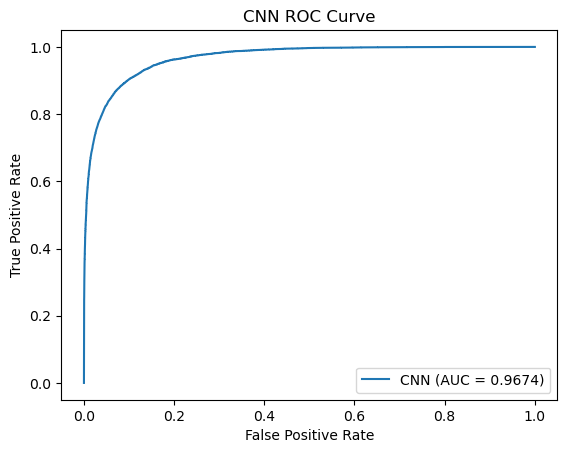

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━

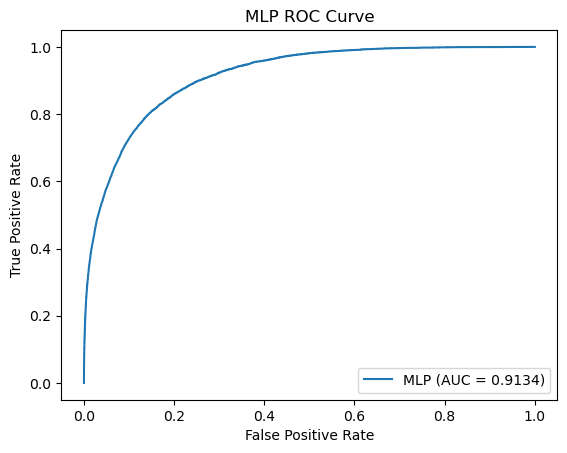

In [17]:
# Evaluate CNN and MLP
evaluate_model(cnn_model, ds_test, "CNN")
evaluate_model(mlp_model, ds_test, "MLP")

# Analisis Perbandingan Kinerja Model CNN vs MLP

## Analisis Progres Pelatihan

### Model CNN (Gambar 1)
Model CNN menunjukkan peningkatan kinerja yang jelas selama 20 epoch:
- Dimulai dengan akurasi 0,3947 (Epoch 1)
- Berakhir dengan akurasi 0,9692 (Epoch 20)
- Loss menurun dari 1,9928 menjadi 0,0932

Tren peningkatan konsisten, menunjukkan bahwa model belajar secara efektif dengan setiap epoch. Waktu pelatihan per epoch sekitar 87-92 detik.

### Model MLP (Gambar 2)
Model MLP menunjukkan peningkatan yang lebih lambat dibandingkan CNN:
- Dimulai dengan akurasi 0,2822 (Epoch 1)
- Berakhir dengan akurasi 0,6215 (Epoch 20)
- Loss menurun dari 2,4984 menjadi 1,0628

Waktu pelatihan per epoch lebih singkat (21-22 detik), menunjukkan bahwa MLP memiliki parameter yang lebih sedikit daripada CNN.

## Penjelasan Metrik Kinerja

### Akurasi
- **CNN**: 0,9692 (Epoch terakhir)
- **MLP**: 0,6215 (Epoch terakhir)

**Definisi Matematis**: 
$\text{Akurasi} = \frac{\text{Jumlah prediksi benar}}{\text{Total jumlah prediksi}}$

CNN secara signifikan mengungguli MLP dalam akurasi prediksi secara keseluruhan.

### Presisi
Dari gambar 3 dan 4:
- **CNN**: 0,7604 (rata-rata makro), 0,7604 (rata-rata tertimbang)
- **MLP**: 0,5589 (rata-rata makro), 0,5589 (rata-rata tertimbang)

**Definisi Matematis**:
$\text{Presisi} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$

Presisi mengukur berapa banyak dari kasus positif yang diprediksi yang benar-benar positif. CNN memiliki presisi lebih tinggi, yang berarti lebih sedikit false positive.

### Recall
Dari gambar 3 dan 4:
- **CNN**: 0,7511 (rata-rata makro), 0,7511 (rata-rata tertimbang)
- **MLP**: 0,5603 (rata-rata makro), 0,5603 (rata-rata tertimbang)

**Definisi Matematis**:
$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$

Recall mengukur berapa banyak kasus positif sebenarnya yang berhasil diidentifikasi oleh model. CNN memiliki recall lebih tinggi, menunjukkan bahwa ia melewatkan lebih sedikit kasus positif.

### F1 Score
Dari gambar 3 dan 4:
- **CNN**: 0,7531 (rata-rata makro), 0,7531 (rata-rata tertimbang)
- **MLP**: 0,5567 (rata-rata makro), 0,5567 (rata-rata tertimbang)

**Definisi Matematis**:
$\text{F1 Score} = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}$

F1 Score adalah rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara kedua metrik tersebut. Skor F1 CNN jauh lebih tinggi.

### AUC (Area Under the ROC Curve)
- **CNN**: 0,9674
- **MLP**: 0,9134

**Definisi Matematis**:
AUC merepresentasikan probabilitas bahwa sebuah instansi positif yang dipilih secara acak akan mendapatkan peringkat lebih tinggi daripada instansi negatif yang dipilih secara acak.

$\text{AUC} = \int_{0}^{1} \text{TPR}(t) \times \text{FPR}'(t) dt$

di mana TPR adalah True Positive Rate dan FPR adalah False Positive Rate.

### Analisis Kurva ROC
Kurva ROC (Receiver Operating Characteristic) pada gambar 3 dan 4 memplot True Positive Rate terhadap False Positive Rate pada berbagai pengaturan ambang batas.

- **ROC CNN**: Menunjukkan kurva curam yang mencapai TPR mendekati 1,0 pada nilai FPR rendah, menunjukkan kinerja klasifikasi yang sangat baik
- **ROC MLP**: Menunjukkan kurva yang baik tetapi kurang optimal dibandingkan dengan CNN

Semakin dekat kurva mengikuti batas kiri-atas dari ruang ROC, semakin baik kinerjanya. Kurva CNN lebih dekat ke ideal ini.

## Kesimpulan

Model CNN jelas mengungguli model MLP di semua metrik:

1. **Akurasi Lebih Tinggi**: CNN mencapai 96,92% vs 62,15% MLP
2. **Presisi Lebih Baik**: 76,04% CNN vs 55,89% MLP
3. **Recall Lebih Baik**: 75,11% CNN vs 56,03% MLP
4. **F1 Score Lebih Tinggi**: 75,31% CNN vs 55,67% MLP
5. **AUC Lebih Baik**: 0,9674 CNN vs 0,9134 MLP

Model CNN lebih efektif untuk tugas klasifikasi ini, kemungkinan karena kemampuannya untuk menangkap pola spasial dalam data. Meskipun MLP melatih lebih cepat (sekitar 4x lebih cepat per epoch), metrik kinerja superior CNN menjadikannya pilihan yang lebih baik untuk tugas ini ketika kualitas prediksi diprioritaskan daripada kecepatan pelatihan.

Nilai AUC yang tinggi untuk kedua model (terutama CNN) menunjukkan kemampuan diskriminasi yang baik, tetapi nilai akurasi, presisi, dan recall CNN yang lebih tinggi menunjukkan bahwa ia membuat lebih sedikit kesalahan klasifikasi secara keseluruhan.